# 🎚 ACF
Try guessing the full name... yeah give it a try. I am watching you 🤨 
<br>
<br>
<br>
Okay it is: *Autocorrelation-function* <br>
It's fine if you didn't get it, or said: Autocovariance ... **FOCUS**! It is Auto-Correlation! not Covariance!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("../data/airline_passengers.csv")

In [86]:
df = df.dropna()

In [87]:
df = df.iloc[:, 1]

In [110]:
tao = 1

corrs = []
while tao < 50:
    X = []
    y = []
    for i in range(df.shape[0] - tao):
        X.append(df.iloc[i])
        y.append(df.iloc[i+tao])
    
    corrs.append(pd.Series(X).corr(pd.Series(y)))
    tao += 1

In [111]:
from statsmodels.graphics.tsaplots import plot_acf

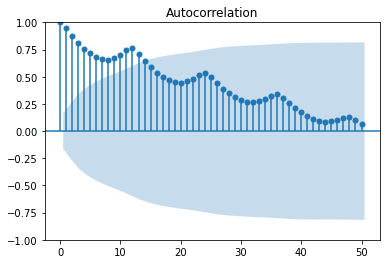

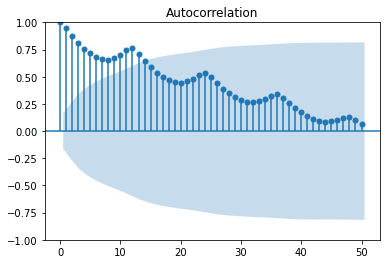

In [112]:
plot_acf(df, lags=50)
# plt.ylim([0, 1])

<BarContainer object of 49 artists>

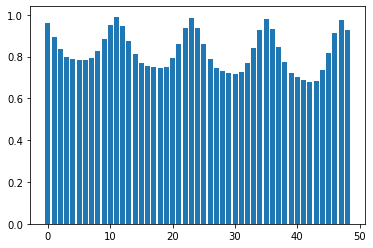

In [113]:
plt.bar(range(len(corrs)), corrs)